In [2]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.io as sio
from scipy import interpolate
import matplotlib.pyplot as plt
from utils import *
from eval_metric import *
from utils2 import *

/n/higgins/z/xjxu/anaconda3/envs/pgadmm/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
def plot_2d_data(data_list, title='density', subtitle=None, cmap='gray', fontsize=10, ):
    nrows = len(data_list)
    ncols = len(data_list[0])
    
    cmap = 'gray'
    fig, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    fig.suptitle(f'{title}', fontsize=10)

    row_count = 0
    for obj_row in data_list:
        col_count = 0
        data_vmin_vmax = [obj_row[0].min(), obj_row[0].max()]
        
        for obj_row_col in obj_row:
            
            # data_vmin_vmax = [obj_row_col.min(), obj_row_col.max()]
            
            ax = axes.reshape(nrows,ncols)[row_count, col_count] if nrows * ncols > 1 else axes
            im = ax.imshow(obj_row_col.squeeze(), cmap=cmap, aspect=1,  vmin=data_vmin_vmax[0], vmax=data_vmin_vmax[1])
            
            ax.xaxis.set_ticks([1, obj_row_col.shape[1]])
            ax.yaxis.set_ticks([1, obj_row_col.shape[0]])
            ax.tick_params(direction="in")
            
            cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower center') 
            fig.colorbar(im, ax=ax, cax=cbaxes, ticks=data_vmin_vmax, format='%.2f', orientation='horizontal')
            
            if subtitle:
                ax.set_title(f'{subtitle[row_count][col_count]}', fontsize=fontsize)
            # ax.text(10, 80, f'{data_name_row}', color='white', fontweight='bold', fontsize=fontsize)
            
            col_count += 1
        row_count += 1
            
    plt.tight_layout()
    plt.show()
    

In [4]:
result_dir  = '/s5/xjxu/exps/pgpr/nature_imgsize128_sf0.02_sigma1.0'
imgsize = 128

/tmp/ipykernel_47945/390014108.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


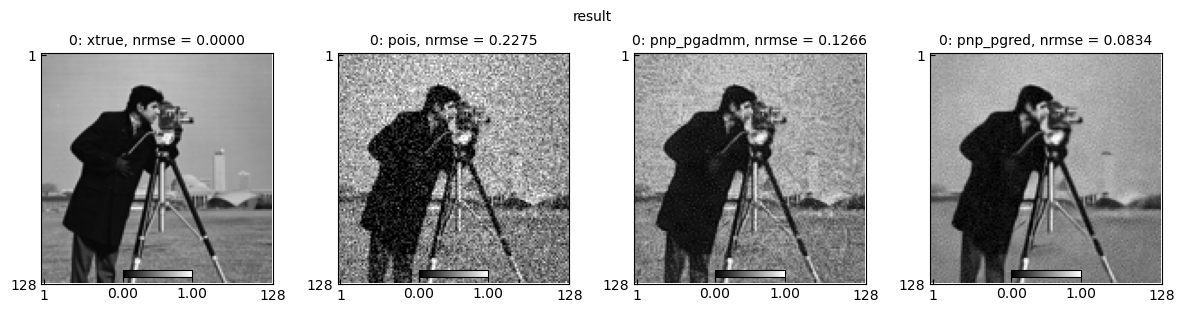

In [43]:
exp_to_show = ['xtrue', 'pois', 'pnp_pgadmm', 'pnp_pgred']
img_to_show = [0]

result_list = []
title_list = []
for img_idx in img_to_show:
    result_list_row =[] 
    title_list_row = []
    for exp_name in exp_to_show:
        if exp_name == 'xtrue':
            exp_path = f'{result_dir}/{img_idx}/init/result.mat'
            result = sio.loadmat(exp_path)
            ximg = result['xtrue'].squeeze()
            xout = vec(ximg)
            xtrue = xout            
            
            result_list_row.append(ximg)
            title_list_row.append(f'{img_idx}: {exp_name}, nrmse = {nrmse(xout, xtrue):.4f}')
            
        elif exp_name == 'xinit':
            exp_path = f'{result_dir}/{img_idx}/init/result.mat'
            result = sio.loadmat(exp_path)
            xout = result['x0'].squeeze()
            ximg = jreshape(xout, imgsize, imgsize)
            
            result_list_row.append(ximg)
            title_list_row.append(f'{img_idx}: {exp_name}, nrmse = {nrmse(xout, xtrue):.4f}')
        
        else:
            if exp_name == 'pnp_pgadmm':
                if img_idx == 0:
                    # exp_path = '/s5/xjxu/exps/pgpr/nature_imgsize128_sf0.02_sigma1.0/0/pnp_pgadmm/sgm15_scale0.5_rho32/2023-03-20-14-51-04_uiter1_muF/result.mat'
                    exp_path = '/s5/xjxu/exps/pgpr/nature_imgsize128_sf0.02_sigma1.0/0/pnp_pgadmm/sgm15_scale0.5_rho32/2023-03-20-14-38-12_uiter1_muF/result.mat'
                if img_idx == 1:
                    exp_path = '/s5/xjxu/exps/pgpr/nature_imgsize128_sf0.02_sigma1.0/1/pnp_pgadmm/sgm15_scale0.5_rho32/2023-03-20-15-56-06_uiter3_muF/result.mat'
                    
            elif exp_name == 'pnp_pgred':
                 if img_idx == 0:
                    exp_path = '/s5/xjxu/exps/pgpr/nature_imgsize128_sf0.02_sigma1.0/0/pnp_pgred/sgm15_scale0.5_rho100/2023-03-20-17-36-12/result.mat'
            else:
                exp_path = f'{result_dir}/{img_idx}/{exp_name}/result.mat'
                
            result = sio.loadmat(exp_path)
            xout = result['xout'].squeeze()
            cout  = result['cout'].squeeze()
            ximg  = jreshape(xout, imgsize, imgsize)
            
            result_list_row.append(ximg)
            title_list_row.append(f'{img_idx}: {exp_name}, nrmse = {cout[-1]:.4f}')
            
    result_list.append(result_list_row)
    title_list.append(title_list_row)
            
plot_2d_data(result_list, title='result', subtitle=title_list, cmap='gray', fontsize=10)